# 1er Parcial
## Joel Fayam Rivera Peña 2076323
### Estadística Aplicada  Gpo.-42

In [ ]:
pip install numpy

In [ ]:
pip install pandas

In [ ]:
pip install matplotlib

In [6]:
## Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


### 1. Películas

In [7]:
Peliculas=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/peliculas.csv')

In [19]:
Peliculas.head()

,title,description,release_year,rental_rate,length,rating,special_features,category
0,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,0.99,86,PG,"Deleted Scenes,Behind the Scenes",Documentary
1,Ace Goldfinger,A Astounding Epistle of a Database Administrat...,2006,4.99,48,G,"Trailers,Deleted Scenes",Horror
2,Adaptation Holes,A Astounding Reflection of a Lumberjack And a ...,2006,2.99,50,NC-17,"Trailers,Deleted Scenes",Documentary
3,Affair Prejudice,A Fanciful Documentary of a Frisbee And a Lumb...,2006,2.99,117,G,"Commentaries,Behind the Scenes",Horror
4,African Egg,A Fast-Paced Documentary of a Pastry Chef And ...,2006,2.99,130,G,Deleted Scenes,Family


In [84]:
# Cuantas  películas  hay,  cuantos  géneros,  y  cuanto  duran  en  promedio  las películas
Cant_Pelis=Peliculas['title'].count()
Cant_Generos=Peliculas['category'].nunique()
Duracion_Promedio=Peliculas['length'].mean()
print(f'Existe un total de {Cant_Pelis} peliculas')
print(f'Dichas peliculas se dividen en {Cant_Generos} generos distintos')
print(f'Y en total, tienen una duración promedio de {Duracion_Promedio} minutos')

Existe un total de 1000 peliculas
Dichas peliculas se dividen en 16 generos distintos
Y en total, tienen una duración promedio de 115.272 minutos


In [67]:
# crea  un  dataframe  llamado películas_dormir  con  las  películas  que  tienen  una duración superior a 2 horas y sean documentale
peliculas_dormir=pd.DataFrame(Peliculas.query('category=="Documentary"& length>120'))
peliculas_dormir.head()

,title,description,release_year,rental_rate,length,rating,special_features,category
39,Army Flintstones,A Boring Saga of a Database Administrator And ...,2006,0.99,148,R,"Trailers,Commentaries",Documentary
57,Beach Heartbreakers,A Fateful Display of a Womanizer And a Mad Sci...,2006,2.99,122,G,"Deleted Scenes,Behind the Scenes",Documentary
128,Cause Date,A Taut Tale of a Explorer And a Pastry Chef wh...,2006,2.99,179,R,"Commentaries,Deleted Scenes,Behind the Scenes",Documentary
141,Chicken Hellfighters,A Emotional Drama of a Dog And a Explorer who ...,2006,0.99,122,PG,"Trailers,Commentaries,Deleted Scenes,Behind th...",Documentary
155,Clerks Angels,A Thrilling Display of a Sumo Wrestler And a G...,2006,4.99,164,G,Commentaries,Documentary


In [76]:
# Contar cuántas películas de cada género existe
Peliculas.value_counts('category')

category
Foreign        73
Sports         73
Family         69
Documentary    68
Animation      66
Action         64
New            63
Drama          61
Games          61
Sci-Fi         61
Children       60
Comedy         58
Classics       57
Horror         56
Travel         56
Music          51
Name: count, dtype: int64

In [78]:
# Calcular la duración promedio de las películas de cada géner
Peliculas.groupby('category')['length'].agg('mean').round(2)

category
Action         111.61
Animation      111.02
Children       109.80
Classics       111.67
Comedy         115.83
Documentary    108.75
Drama          119.89
Family         114.78
Foreign        121.70
Games          127.84
Horror         112.48
Music          113.65
New            111.13
Sci-Fi         108.20
Sports         127.51
Travel         113.38
Name: length, dtype: float64

In [79]:
# Crear una nueva columna que indique si una película es 
# "Corta" (duración menor a 1.5 horas), "Normal" (entre 1.5 y 2.5 horas) o "Larga" (mayor a 2.5 horas).
condicion=[ Peliculas['length']<=90,
            Peliculas['length']<=150,
            Peliculas['length']>150]
clasificacion=['Corta','Normal','Larga']
Peliculas['Duracion']=np.select(condicion,clasificacion)

In [83]:
Peliculas.head()

,title,description,release_year,rental_rate,length,rating,special_features,category,Duracion
0,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,0.99,86,PG,"Deleted Scenes,Behind the Scenes",Documentary,Corta
1,Ace Goldfinger,A Astounding Epistle of a Database Administrat...,2006,4.99,48,G,"Trailers,Deleted Scenes",Horror,Corta
2,Adaptation Holes,A Astounding Reflection of a Lumberjack And a ...,2006,2.99,50,NC-17,"Trailers,Deleted Scenes",Documentary,Corta
3,Affair Prejudice,A Fanciful Documentary of a Frisbee And a Lumb...,2006,2.99,117,G,"Commentaries,Behind the Scenes",Horror,Normal
4,African Egg,A Fast-Paced Documentary of a Pastry Chef And ...,2006,2.99,130,G,Deleted Scenes,Family,Normal


### 2. Asgard

In [32]:
Asgard=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/poblacion_Asgard.csv')

In [85]:
Asgard.head()

,País,Estado,Municipio,Población
0,Asgard,Pandora,Reino Tierra,377896
1,Asgard,Alderaan,Fuente Dorada,49984
2,Asgard,Genosha,El Carmen,303918
3,Asgard,Naboo,Omashu,265712
4,Asgard,Mordor,Don Bosco,121151


In [87]:
# Ordena la base alfabéticamente por estado y por municipio
Asgard.sort_values(['Estado','Municipio'])

,País,Estado,Municipio,Población
16,Asgard,Alderaan,Ciudad Jedi,130312
1,Asgard,Alderaan,Fuente Dorada,49984
31,Asgard,Alderaan,Luz azul,914910
76,Asgard,Alderaan,Madero,774290
46,Asgard,Alderaan,San Isidro,159338
...,...,...,...,...
8,Asgard,Yaven,El Bosque,649663
83,Asgard,Yaven,Green Flag,380989
68,Asgard,Yaven,Santa María,111687
53,Asgard,Yaven,Villa Wendy,646914


In [116]:
#Cuantos  estados  hay,  cuantos  municipios  hay  en  cada  estado  y  cuantos municipios hay en total.
Cant_Estados=Asgard['Estado'].nunique()
Cant_Municipios=Asgard['Municipio'].nunique()
print(f'Hay un total de {Cant_Estados} estados')
print(f'Y un total de {Cant_Municipios} municipios distintos')

Hay un total de 15 estados
Y un total de 59 municipios distintos


In [115]:
Asgard.groupby('Estado')['Municipio'].agg('count')

Estado
Alderaan     6
Atlantis     6
Endor        6
Genosha      6
Gotham       6
Mandalore    6
Mordor       6
Mustafar     6
Naboo        6
Narnia       6
Pandora      6
Sokovia      6
Tatooine     6
Wakanda      6
Yaven        6
Name: Municipio, dtype: int64

In [123]:
# Calcula la mediana de la población de los municipios, y clasifícalos, 
# aquellos por arriba de la mediana deben llamarse “muy poblados” y aquellos debajo de la mediana “poco poblados”
Mediana=Asgard['Población'].median()

In [124]:
Mediana

450052.0

In [119]:
Asgard['Clasificacion Poblacional']=np.where(Asgard['Población']>=Mediana,'Muy poblados','Poco poblados')

In [126]:
Asgard

,País,Estado,Municipio,Población,Clasificacion Poblacional
0,Asgard,Pandora,Reino Tierra,377896,Poco poblados
1,Asgard,Alderaan,Fuente Dorada,49984,Poco poblados
2,Asgard,Genosha,El Carmen,303918,Poco poblados
3,Asgard,Naboo,Omashu,265712,Poco poblados
4,Asgard,Mordor,Don Bosco,121151,Poco poblados
...,...,...,...,...,...
85,Asgard,Gotham,Mar violeta,44585,Poco poblados
86,Asgard,Mandalore,Mar amarillo,372369,Poco poblados
87,Asgard,Mustafar,Mar Azul,65044,Poco poblados
88,Asgard,Atlantis,Mar amarillo,961061,Muy poblados


In [129]:
# Encuentra  los  5  municipios  mas  poblados  y  los  cinco  municipios  menos poblados del país
Asgard.sort_values('Población',ascending=False).head(5)[['País','Estado','Municipio','Población']]

,País,Estado,Municipio,Población
34,Asgard,Mordor,Madripur,998079
27,Asgard,Mustafar,Villa Norte,997107
6,Asgard,Sokovia,La Unión,986067
74,Asgard,Narnia,Gral Escobedo,974548
79,Asgard,Mordor,Yellow town,974324


In [130]:
Asgard.sort_values('Población',ascending=True).head(5)[['País','Estado','Municipio','Población']]

,País,Estado,Municipio,Población
17,Asgard,Genosha,Ciudad Jedi,13666
14,Asgard,Narnia,Luz roja,14986
39,Asgard,Endor,Villa rosa,25538
26,Asgard,Mandalore,Shelbyville,31535
85,Asgard,Gotham,Mar violeta,44585


In [139]:
# El municipio más poblado de cada estado
Max_Pob=Asgard.groupby('Estado')['Población'].idxmax()

In [149]:
Asgard.loc[Max_Pob]

,País,Estado,Municipio,Población,Clasificacion Poblacional
31,Asgard,Alderaan,Luz azul,914910,Muy poblados
88,Asgard,Atlantis,Mar amarillo,961061,Muy poblados
69,Asgard,Endor,Santa María,875371,Muy poblados
32,Asgard,Genosha,Villa Lannister,822654,Muy poblados
55,Asgard,Gotham,Playa Verde,918710,Muy poblados
71,Asgard,Mandalore,San Pedro,736716,Muy poblados
34,Asgard,Mordor,Madripur,998079,Muy poblados
27,Asgard,Mustafar,Villa Norte,997107,Muy poblados
33,Asgard,Naboo,Luz azul,602661,Muy poblados
74,Asgard,Narnia,Gral Escobedo,974548,Muy poblados


### Gráficos

In [168]:
# a)Los 15 municipios más poblados de Asgard
Max_Pob_Mun=Asgard.groupby('Municipio')['Población'].max()

In [173]:
Max_Pob_Mun=Max_Pob_Mun.sort_values(ascending=False)

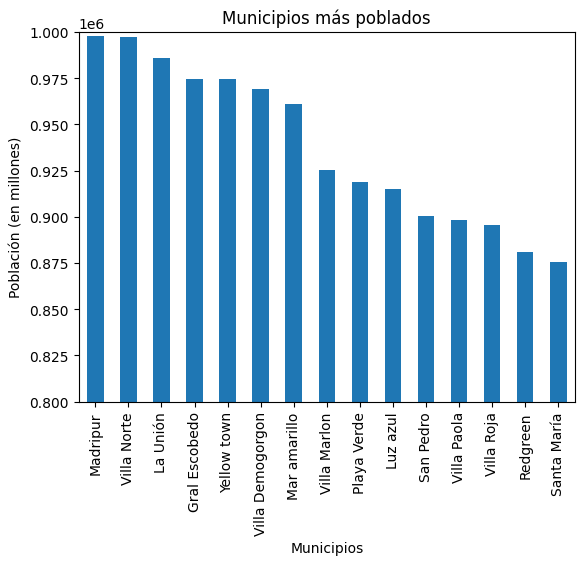

In [189]:
Max_Pob_Mun[0:15].plot.bar()
plt.title('Municipios más poblados')
plt.xlabel('Municipios')
plt.ylabel('Población (en millones)')
plt.ylim(800000,1000000)
plt.show()

In [192]:
# b)Cuantas peliculas hay de cada género
Peliculas_Por_Genero=Peliculas.value_counts('category').sort_values(ascending=False)

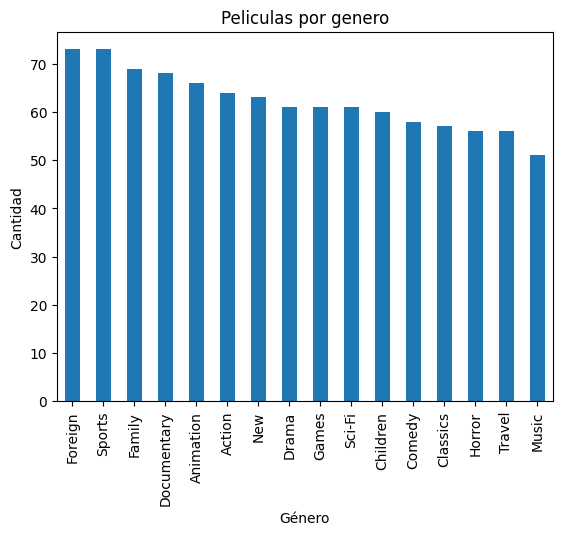

In [195]:
Peliculas_Por_Genero.plot.bar()
plt.title('Peliculas por genero')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()